In [1]:
print("Hello World!")

Hello World!


In [15]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


In [17]:
df = pd.read_csv("Employe_Performance_dataset.csv")
df.head()


,ID,Name,Age,Gender,Department,Salary,Joining Date,Performance Score,Experience,Status,Location,Session
0,1,Cory Escobar,48,Female,HR,5641,2015-05-03,2.0,16,Active,New York,Night
1,2,Timothy Sanchez,25,Other,Sales,4249,2020-11-09,2.0,11,Inactive,Los Angeles,Evening
2,3,Chad Nichols,57,Other,Sales,3058,2019-02-12,NaN,1,Inactive,New York,Morning
3,4,Christine Williams,58,Female,IT,5895,2017-09-08,2.0,13,Inactive,Los Angeles,Evening
4,5,Amber Harris,35,Other,IT,4317,2020-02-15,5.0,16,Inactive,New York,Evening


In [18]:
df.isnull().sum()


ID                     0
Name                   0
Age                    0
Gender                 0
Department             0
Salary                 0
Joining Date           0
Performance Score    498
Experience             0
Status                 0
Location               0
Session                0
dtype: int64

In [19]:
df_clean = df[['Age', 'Experience', 'Performance Score', 'Salary']].dropna()


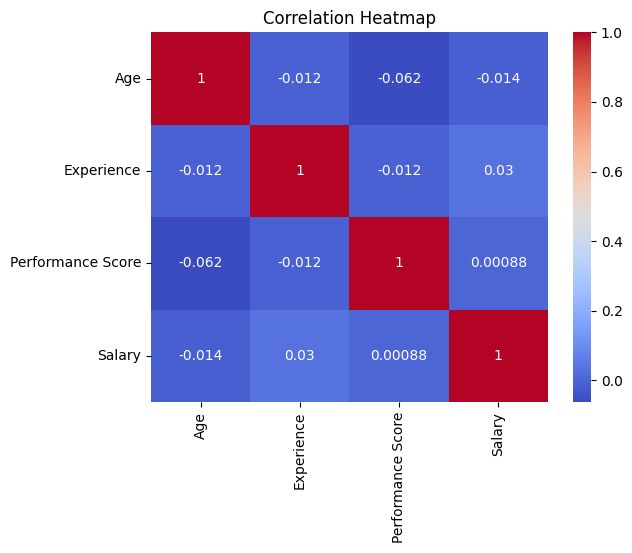

In [20]:
sns.heatmap(df_clean.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [8]:
X = df_clean[['Age', 'Experience', 'Performance Score']]  # feature
y = df_clean['Salary']  # goal


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(" R^2 Score:", round(r2, 4))
print(" Mean Squared Error:", round(mse, 2))


 R^2 Score: -0.0461
 Mean Squared Error: 5016210.78


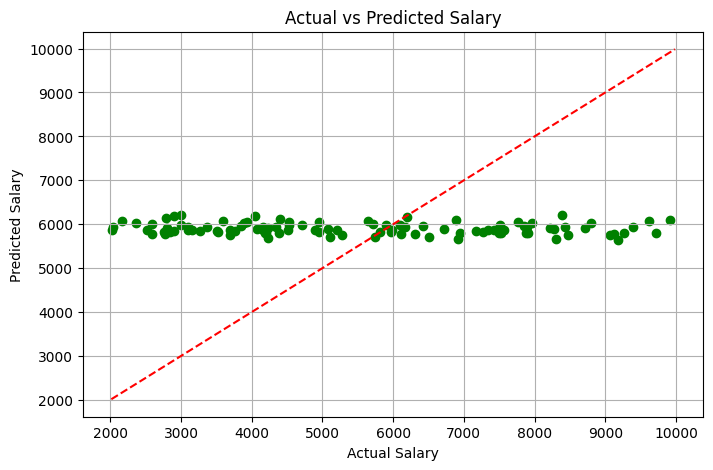

In [25]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Ideal line
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.grid(True)
plt.show()


In [26]:
import joblib
joblib.dump(model, 'salary_prediction_model.pkl')


['salary_prediction_model.pkl']